# Лабораторная работа №8

***Задание:*** Используя схемы *переменных направлений* и *дробных шагов*, решить двумерную начально-краевую задачу для дифференциального *уравнения параболического типа*. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $u(x, y, t)$. Исследовать зависимость погрешности от сеточных параметров $\tau$ и $h_x$, $h_y$.

#### Вариант №16

***Уравнение:***

$$\displaystyle\frac{\partial u}{\partial t} =  a\displaystyle\frac{\partial^2 u}{\partial x^2} + a\displaystyle\frac{\partial^2 u}{\partial y^2}, \; a >  0$$

\begin{equation*}
 \begin{cases}
   u (0, y, \: t) = \sinh{y} \cdot e^{-3at}
   \\
   u (\frac{\pi}{4}, y, \: t) = -2\sinh{y}\cdot e^{-3at}
   \\
   u (x, 0, \: t) = \cos{2x} \cdot e^{-3at}
   \\
   u_{y}' (x, \ln{2}, \: t) = \frac{3}{4} \cos{2x} \cdot e^{-3at}
   \\
   u(x, y, 0) = cos{2x} \sinh{y}
 \end{cases}
\end{equation*}

***Аналитическое решение:***
$$u(x, y, t) = e^{-3at} \cos{2x} \sinh{y}$$

Будем решать задачу на заданной площади  от $0$ до $l_x$ по координате $x$, от $0$ до $l_y$ по координате $y$ и на промежутке от $0$ до заданного параметра $T$ по времени $t$.

Рассмотрим конечно-разностную схему решения краевой задачи на сетке с граничными парамерами $l_x$, $l_y$, $T$ и параметрами насыщенности сетки $N_x$, $N_y$, $K$. Тогда размер шага по каждой из координат определяется:
$$h_x = \displaystyle\frac{l_x}{N_x -1}, \; h_y = \displaystyle\frac{l_y}{N_y -1} , \; \tau = \displaystyle\frac{T}{K-1}$$


Конечно-разностная схема решения параболического типа в сетке на временном слое $t^{k+1}$ определяется с помощью 2-ух этапов, на каждом из которых решается трёхдиагональное уравнение с помощью метода прогонки:
- Считая, что значения функции $u^k_{i, j} = u(x_i, y_j, t^k)$ на временном слое $t^{k}$ известно, попробуем определить значения функции на временном слое $t^{k + \frac{1}{2}}$ путем разностной апроксимации производной по времени:$\displaystyle\frac{\partial u}{\partial t}(x_i, y_j, t^k) = (1 + \gamma)\displaystyle\frac{u^{k+\frac{1}{2}}_{i, j} - u^{k}_{i, j}}{\tau}$, неявной аппроксимацией производной по $x$: $\displaystyle\frac{\partial^2 u}{\partial x^2}(x_i, y_j, t^k) = \displaystyle\frac{u^{k+\frac{1}{2}}_{i-1, j} - 2 u^{k + \frac{1}{2}}_{i, j} + u^{k+\frac{1}{2}}_{i+1, j}}{h_x^2}$ и явной аппроксимацией по $y$: $\displaystyle\frac{\partial^2 u}{\partial y^2}(x_i, y_j, t^k) = \displaystyle\frac{u^k_{i, j-1} - 2 u^k_{i, j} + u^k_{i, j+1}}{h_y^2}$ получаем уравнение:

<!-- $$(1 + \gamma)\displaystyle\frac{u^{k+\frac{1}{2}}_{i, j} - u^{k}_{i, j}}{\tau} = a\displaystyle\frac{u^{k+\frac{1}{2}}_{i-1, j} - 2 u^{k + \frac{1}{2}}_{i, j} + u^{k+\frac{1}{2}}_{i+1, j}}{h_x^2} +  a \gamma \displaystyle\frac{u^k_{i, j-1} - 2 u^k_{i, j} + u^k_{i, j+1}}{h_y^2}$$ -->

$$ -a \tau h_x^2 \gamma u^{k}_{i, j-1} - ((1 + \gamma) h_x^2 h_y^2 - 2 a \tau h_x^2 \gamma) u^{k}_{i, j} - a \tau h_x^2 \gamma u^{k}_{i, j+1} =  a \tau h_y^2 u^{k+\frac{1}{2}}_{i-1, j} - (2a \tau h_y^2 + (1 + \gamma) h_x^2 h_y^2) u^{k+\frac{1}{2}}_{i, j} + a \tau h_y^2 u^{k+\frac{1}{2}}_{i+1, j}$$


- Считая, что значения функции $u^{k+\frac{1}{2}}_{i, j} = u(x_i, y_j, t^{k+\frac{1}{2}})$ на временном слое $t^{k + \frac{1}{2}}$ известно из прошлого этапа, попробуем определить значения функции на временном слое $t^{k + 1}$ путем разностной апроксимации производной по времени:$\displaystyle\frac{\partial u}{\partial t}(x_i, y_j, t^{k+\frac{1}{2}}) = (1 + \gamma)\displaystyle\frac{u^{k+1}_{i, j} - u^{k+\frac{1}{2}}_{i, j}}{\tau}$, явной аппроксимацией производной по $x$: $\displaystyle\frac{\partial^2 u}{\partial x^2}(x_i, y_j, t^{k+\frac{1}{2}}) = \displaystyle\frac{u^{k+\frac{1}{2}}_{i-1, j} - 2 u^{k + \frac{1}{2}}_{i, j} + u^{k+\frac{1}{2}}_{i+1, j}}{h_x^2}$ и неявной аппроксимацией по $y$: $\displaystyle\frac{\partial^2 u}{\partial y^2}(x_i, y_j, t^{k+\frac{1}{2}}) = \displaystyle\frac{u^{k+1}_{i, j-1} - 2 u^{k+1}_{i, j} + u^{k+1}_{i, j+1}}{h_y^2}$ получим второе уравнение:

$$ -a \tau h_y^2 \gamma u^{k+\frac{1}{2}}_{i-1, j} - ((1 + \gamma) h_x^2 h_y^2 - 2 a \tau h_y^2 \gamma) u^{k + \frac{1}{2}}_{i, j} - a \tau h_y^2 \gamma u^{k+\frac{1}{2}}_{i+1, j} =  a \tau h_x^2 u^{k+1}_{i, j-1} - (2a \tau h_x^2 + (1 + \gamma) h_x^2 h_y^2) u^{k+1}_{i, j} + a \tau h_x^2 u^{k+1}_{i, j+1}$$

При $\gamma = 1$ получаем метод переменных направлений, когда как при $\gamma = 0$ - метод дробных шагов.

Значения на слое $u^0_{i,j}$ и на границах сетки определяются с помощью заданных граничных условий и их аппроксимаций.

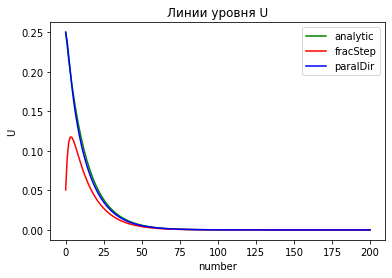

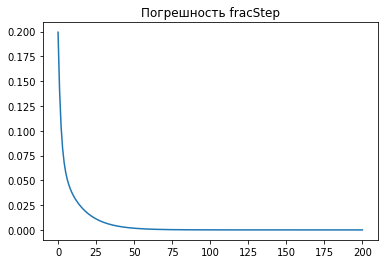

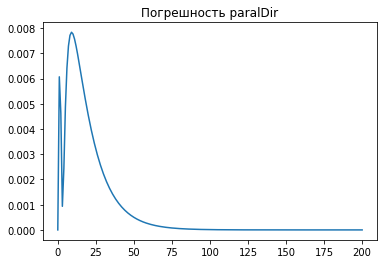

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def tma(a, b, c, d):
    size = len(a)
    p, q = [], []
    p.append(-c[0] / b[0])
    q.append(d[0] / b[0])

    for i in range(1, size):
        p_tmp = -c[i] / (b[i] + a[i] * p[i - 1])
        q_tmp = (d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1])
        p.append(p_tmp)
        q.append(q_tmp)

    x = [0 for _ in range(size)]
    x[size - 1] = q[size - 1]

    for i in range(size - 2, -1, -1):
        x[i] = p[i] * x[i + 1] + q[i]

    return x

class Data:
	def __init__(self, args):
		self.a = args['a']
		self.b = args['b']
		self.c = args['c']
		self.d = args['d']
		self.lx = args['lx']
		self.ly = args['ly']
		self.f = args['f']
		self.alpha1 = args['alpha1']
		self.alpha2 = args['alpha2']
		self.beta1 = args['beta1']
		self.beta2 = args['beta2']
		self.gamma1 = args['gamma1']
		self.gamma2 = args['gamma2']
		self.delta1 = args['delta1']
		self.delta2 = args['delta2']
		self.phi11 = args['phi11']
		self.phi21 = args['phi21']
		self.phi12 = args['phi12']
		self.phi22 = args['phi22']
		self.psi = args['psi']
		self.solution = args['solution']


class ParabolicSolver:
	def __init__(self, args, nx, ny, T, K):
		self.data = Data(args)
		self.hx = self.data.lx / nx
		self.hy = self.data.ly / ny
		self.tau = T / K
		self.x, self.y, self.t = self.prepare(nx, ny, T, K)
		self.uu = self.initalizeU(self.x, self.y, self.t)

	def getCoeffs(self, n):
		aa = np.zeros(len(n))
		bb = np.zeros(len(n))
		cc = np.zeros(len(n))
		dd = np.zeros(len(n))

		return aa, bb, cc, dd

	def computeCoeffs(self, x, y, t2, j):
		aa, bb, cc, dd = self.getCoeffs(x)
		bb[0] = self.hx * self.data.alpha2 - self.data.alpha1
		bb[-1] = self.hx * self.data.beta2 + self.data.beta1
		cc[0] = self.data.alpha1
		aa[-1] = -self.data.beta1
		dd[0] = self.data.phi11(y[j], t2) * self.hx
		dd[-1] = self.data.phi12(y[j], t2) * self.hx

		return aa, bb, cc, dd

	def prepare(self, nx, ny, T, K):
		self.hx = self.data.lx / nx
		self.hy = self.data.ly / ny
		self.tau = T / K
		x = np.arange(0, self.data.lx + self.hx, self.hx)
		y = np.arange(0, self.data.ly + self.hy, self.hy)
		t = np.arange(0, T + self.tau, self.tau)

		return x, y, t

	def initalizeU(self, x, y, t):
		u = np.zeros((len(x), len(y), len(t)))
		for i in range(len(x)):
			for j in range(len(y)):
				u[i][j][0] = self.data.psi(x[i], y[j])

		return u

	def analyticSolve(self, nx, ny, T, K):
		x, y, t = self.prepare(nx, ny, T, K)

		uu = np.zeros((len(x), len(y), len(t)))

		for i in range(len(x)):
			for j in range(len(y)):
				for k in range(len(t)):
					uu[i][j][k] = self.data.solution(x[i], y[j], t[k])

		return uu

	def parallelDirections_solver(self):
		for k in range(1, len(self.t)):
			u1 = np.zeros((len(self.x), len(self.y)))
			t2 = self.t[k] - self.tau / 2
			for j in range(len(self.y) - 1):
				aa, bb, cc, dd = self.computeCoeffs(self.x, self.y, t2, j)
				for i in range(len(self.x) - 1):
					aa[i] = self.data.a - self.hx * self.data.c / 2
					bb[i] = self.hx ** 2 - 2 * (self.hx ** 2) / self.tau - 2 * self.data.a
					cc[i] = self.data.a + self.hx * self.data.c / 2
					dd[i] = -2 * (self.hx ** 2) * self.uu[i][j][k - 1] / self.tau
					- self.data.b * (self.hx ** 2) * (self.uu[i][j + 1][k - 1]
													  - 2 * self.uu[i][j][k - 1] + self.uu[i][j - 1][k - 1]) / (self.hy ** 2)
					- self.data.d * (self.hx ** 2) * (self.uu[i][j + 1][k - 1] - self.uu[i][j - 1][k - 1]) / (2 * self.hy ** 2)
					- (self.hx ** 2) * self.data.f(self.x[i], self.y[j], self.t[k])

				xx = tma(aa, bb, cc, dd)
				for i in range(len(self.x)):
					u1[i][j] = xx[i]
					u1[i][0] = (self.data.phi21(self.x[i], t2) - self.data.gamma1 * u1[i][1] / self.hy) / (
							self.data.gamma2 - self.data.gamma1 / self.hy)
					u1[i][-1] = (self.data.phi22(self.x[i], t2) + self.data.delta1 * u1[i][-2] / self.hy) / (
							self.data.delta2 + self.data.delta1 / self.hy)
			for j in range(len(self.y)):
				u1[0][j] = (self.data.phi11(self.y[j], t2) - self.data.alpha1 * u1[1][j] / self.hx) / (
							self.data.alpha2 - self.data.alpha1 / self.hx)
				u1[-1][j] = (self.data.phi12(self.y[j], t2) + self.data.beta1 * u1[-2][j] / self.hx) / (
							self.data.beta2 + self.data.beta1 / self.hx)
			u2 = np.zeros((len(self.x), len(self.y)))
			for i in range(len(self.x) - 1):
				aa, bb, cc, dd = self.getCoeffs(self.y)
				bb[0] = self.hy * self.data.gamma2 - self.data.gamma1
				bb[-1] = self.hy * self.data.delta2 + self.data.delta1
				cc[0] = self.data.gamma1
				aa[-1] = -self.data.delta1
				dd[0] = self.data.phi21(self.x[i], self.t[k]) * self.hy
				dd[-1] = self.data.phi22(self.x[i], self.t[k]) * self.hy

				for j in range(len(self.y) - 1):
					aa[j] = self.data.b - self.hy * self.data.d / 2
					bb[j] = self.hy ** 2 - 2 * (self.hy ** 2) / self.tau - 2 * self.data.b
					cc[j] = self.data.b + self.hy * self.data.d / 2
					dd[j] = -2 * (self.hy ** 2) * u1[i][j] / self.tau
					- self.data.a * (self.hy ** 2) * (u1[i + 1][j]
													  - 2 * u1[i][j] + u1[i - 1][j]) / (self.hx ** 2)
					- self.data.c * (self.hy ** 2) * (u1[i + 1][j] - u1[i - 1][j]) / (2 * self.hx ** 2)
					- (self.hy ** 2) * self.data.f(self.x[i], self.y[j], self.t[k])
				xx = tma(aa, bb, cc, dd)
				for j in range(len(self.y)):
					u2[i][j] = xx[j]
					u2[0][j] = (self.data.phi11(self.y[j], self.t[k]) - self.data.alpha1 * u2[1][j] / self.hx) / (
								self.data.alpha2 - self.data.alpha1 / self.hx)
					u2[-1][j] = (self.data.phi12(self.y[j], self.t[k]) + self.data.beta1 * u2[-2][j] / self.hx) / (
								self.data.beta2 + self.data.beta1 / self.hx)
			for i in range(len(self.x)):
				u2[i][0] = (self.data.phi21(self.x[i], self.t[k]) - self.data.gamma1 * u2[i][1] / self.hy) / (
							self.data.gamma2 - self.data.gamma1 / self.hy)
				u2[i][-1] = (self.data.phi22(self.x[i], self.t[k]) + self.data.delta1 * u2[i][-2] / self.hy) / (
							self.data.delta2 + self.data.delta1 / self.hy)
			for i in range(len(self.x)):
				for j in range(len(self.y)):
					self.uu[i][j][k] = u2[i][j]
		return self.uu

	def fractionalSteps_solver(self):
		for k in range(len(self.t)):
			u1 = np.zeros((len(self.x), len(self.y)))
			t2 = self.t[k] - self.tau / 2
			for j in range(len(self.y) - 1):
				aa, bb, cc, dd = self.computeCoeffs(self.x, self.y, t2, j)
				for i in range(len(self.x) - 1):
					aa[i] = self.data.a
					bb[i] = -(self.hx ** 2) / self.tau - 2 * self.data.a
					cc[i] = self.data.a
					dd[i] = -(self.hx ** 2) * self.uu[i][j][k - 1] / self.tau - (self.hx ** 2) * self.data.f(self.x[i], self.y[j],
																										t2) / 2
				xx = tma(aa, bb, cc, dd)
				for i in range(len(self.x)):
					u1[i][j] = xx[i]
					u1[i][0] = (self.data.phi21(self.x[i], t2) - self.data.gamma1 * u1[i][1] / self.hy) / (
							self.data.gamma2 - self.data.gamma1 / self.hy)
					u1[i][-1] = (self.data.phi22(self.x[i], t2) + self.data.delta1 * u1[i][-2] / self.hy) / (
							self.data.delta2 + self.data.delta1 / self.hy)
			for j in range(len(self.y)):
				u1[0][j] = (self.data.phi11(self.y[j], t2) - self.data.alpha1 * u1[1][j] / self.hx) / (
						self.data.alpha2 - self.data.alpha1 / self.hx)
				u1[-1][j] = (self.data.phi12(self.y[j], t2) + self.data.beta1 * u1[-2][j] / self.hx) / (
						self.data.beta2 + self.data.beta1 / self.hx)
			#####
			u2 = np.zeros((len(self.x), len(self.y)))
			for i in range(len(self.x) - 1):
				aa, bb, cc, dd = self.getCoeffs(self.y)
				bb[0] = self.hy * self.data.gamma2 - self.data.gamma1
				bb[-1] = self.hy * self.data.delta2 + self.data.delta1
				cc[0] = self.data.gamma1
				aa[-1] = -self.data.delta1
				dd[0] = self.data.phi21(self.x[i], self.t[k]) * self.hy
				dd[-1] = self.data.phi22(self.x[i], self.t[k]) * self.hy

				for j in range(len(self.y) - 1):
					aa[j] = self.data.b
					bb[j] = -(self.hy ** 2) / self.tau - 2 * self.data.b
					cc[j] = self.data.b
					dd[j] = -(self.hy ** 2) * u1[i][j] / self.tau - (self.hy ** 2) * self.data.f(self.x[i], self.y[j], self.t[k]) / 2
				xx = tma(aa, bb, cc, dd)
				for j in range(len(self.y)):
					u2[i][j] = xx[j]
					u2[0][j] = (self.data.phi11(self.y[j], self.t[k]) - self.data.alpha1 * u2[1][j] / self.hx) / (
							self.data.alpha2 - self.data.alpha1 / self.hx)
					u2[-1][j] = (self.data.phi12(self.y[j], self.t[k]) + self.data.beta1 * u2[-2][j] / self.hx) / (
							self.data.beta2 + self.data.beta1 / self.hx)
			for i in range(len(self.x)):
				u2[i][0] = (self.data.phi21(self.x[i], self.t[k]) - self.data.gamma1 * u2[i][1] / self.hy) / (
						self.data.gamma2 - self.data.gamma1 / self.hy)
				u2[i][-1] = (self.data.phi22(self.x[i], self.t[k]) + self.data.delta1 * u2[i][-2] / self.hy) / (
						self.data.delta2 + self.data.delta1 / self.hy)
			for i in range(len(self.x)):
				for j in range(len(self.y)):
					self.uu[i][j][k] = u2[i][j]
		return self.uu

def presontation(dict_, data, args, y_point, time):

  plt.title('Линии уровня U')
  plt.plot(dict_['analytic'][time][y_point], color='g', label='analytic')
  plt.plot(dict_['fracStep'][time][y_point], color='r', label='fracStep')
  plt.plot(dict_['paralDir'][time][y_point], color='b', label='paralDir')
  plt.legend(loc='best')
  plt.ylabel('U')
  plt.xlabel('number')
  plt.show()


  plt.title('Погрешность fracStep')
  plt.plot(abs(dict_['analytic'][time][y_point] - dict_['fracStep'][time][y_point]))
  plt.show()


  plt.title('Погрешность paralDir')
  plt.plot(abs(dict_['analytic'][time][y_point] - dict_['paralDir'][time][y_point]))
  plt.show()


data = {'a': 1, 'nx': 40, 'ny': 40, 'T': 5, 'K': 200}
a, nx, ny, T, K = int(data['a']), int(data['nx']), int(data['ny']), int(data['T']), int(data['K'])
args = {
	'a': a,
	'b': a,
	'c': 0,
	'd': 0,
	'lx': np.pi / 4,
	'ly': np.log(2),
	'f': lambda x, y, t: 0,
	'alpha1': 0,
	'alpha2': 1,
	'beta1': 1,
	'beta2': 0,
	'gamma1': 1,
	'gamma2': 0,
	'delta1': 0,
	'delta2': 1,
	'phi11': lambda y, t: np.sinh(y) * np.exp(-3 * a * t),
	'phi12': lambda y, t: -2 * np.sinh(y) * np.exp(-3 * a * t),
	'phi21': lambda x, t: np.cos(2 * x) * np.exp(-3 * a * t),
	'phi22': lambda x, t: 3 / 4 * np.cos(2 * x) * np.exp(-3 * a * t),
	'psi': lambda x, y: np.cos(2 * x) * np.sinh(y),
	'solution': lambda x, y, t: np.cos(2 * x) * np.sinh(y) * np.exp(-3 * a * t)
}

solver = ParabolicSolver(args, nx, ny, T, K)
solverFrac = ParabolicSolver(args, nx, ny, T, K)
solverParal = ParabolicSolver(args, nx, ny, T, K)
ans = {
	'fracStep': solverFrac.fractionalSteps_solver(),
	'paralDir': solverParal.parallelDirections_solver(),
	'analytic': solver.analyticSolve(nx, ny, T, K)
}

presontation(ans, data, args, 20, 20)

## Исследование зависимости погрешности от параметров tau, hx, hy

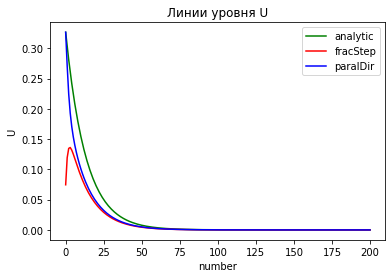

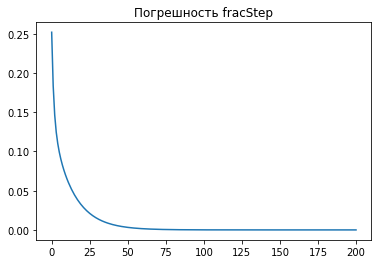

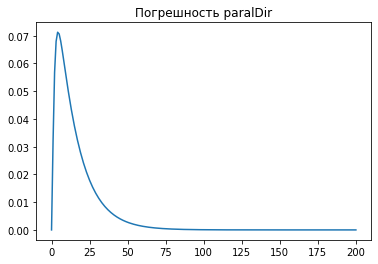

In [ ]:
data = {'a': 1, 'nx': 80, 'ny': 40, 'T': 5, 'K': 200}
a, nx, ny, T, K = int(data['a']), int(data['nx']), int(data['ny']), int(data['T']), int(data['K'])
args = {
	'a': a,
	'b': a,
	'c': 0,
	'd': 0,
	'lx': np.pi / 4,
	'ly': np.log(2),
	'f': lambda x, y, t: 0,
	'alpha1': 0,
	'alpha2': 1,
	'beta1': 1,
	'beta2': 0,
	'gamma1': 1,
	'gamma2': 0,
	'delta1': 0,
	'delta2': 1,
	'phi11': lambda y, t: np.sinh(y) * np.exp(-3 * a * t),
	'phi12': lambda y, t: -2 * np.sinh(y) * np.exp(-3 * a * t),
	'phi21': lambda x, t: np.cos(2 * x) * np.exp(-3 * a * t),
	'phi22': lambda x, t: 3 / 4 * np.cos(2 * x) * np.exp(-3 * a * t),
	'psi': lambda x, y: np.cos(2 * x) * np.sinh(y),
	'solution': lambda x, y, t: np.cos(2 * x) * np.sinh(y) * np.exp(-3 * a * t)
}

solver = ParabolicSolver(args, nx, ny, T, K)
solverFrac = ParabolicSolver(args, nx, ny, T, K)
solverParal = ParabolicSolver(args, nx, ny, T, K)
ans = {
	'fracStep': solverFrac.fractionalSteps_solver(),
	'paralDir': solverParal.parallelDirections_solver(),
	'analytic': solver.analyticSolve(nx, ny, T, K)
}

presontation(ans, data, args, 20, 20)

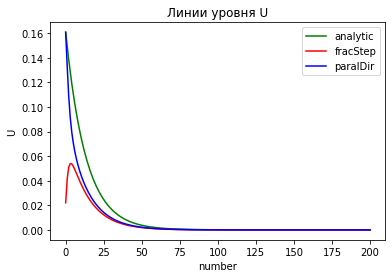

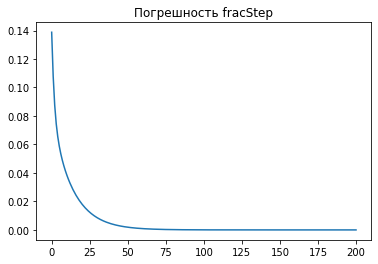

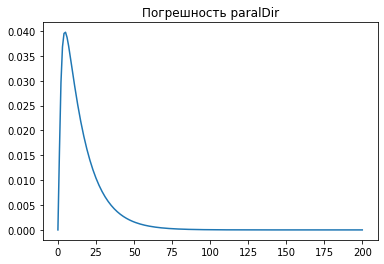

In [ ]:
data = {'a': 1, 'nx': 80, 'ny': 80, 'T': 5, 'K': 200}
a, nx, ny, T, K = int(data['a']), int(data['nx']), int(data['ny']), int(data['T']), int(data['K'])
args = {
	'a': a,
	'b': a,
	'c': 0,
	'd': 0,
	'lx': np.pi / 4,
	'ly': np.log(2),
	'f': lambda x, y, t: 0,
	'alpha1': 0,
	'alpha2': 1,
	'beta1': 1,
	'beta2': 0,
	'gamma1': 1,
	'gamma2': 0,
	'delta1': 0,
	'delta2': 1,
	'phi11': lambda y, t: np.sinh(y) * np.exp(-3 * a * t),
	'phi12': lambda y, t: -2 * np.sinh(y) * np.exp(-3 * a * t),
	'phi21': lambda x, t: np.cos(2 * x) * np.exp(-3 * a * t),
	'phi22': lambda x, t: 3 / 4 * np.cos(2 * x) * np.exp(-3 * a * t),
	'psi': lambda x, y: np.cos(2 * x) * np.sinh(y),
	'solution': lambda x, y, t: np.cos(2 * x) * np.sinh(y) * np.exp(-3 * a * t)
}

solver = ParabolicSolver(args, nx, ny, T, K)
solverFrac = ParabolicSolver(args, nx, ny, T, K)
solverParal = ParabolicSolver(args, nx, ny, T, K)
ans = {
	'fracStep': solverFrac.fractionalSteps_solver(),
	'paralDir': solverParal.parallelDirections_solver(),
	'analytic': solver.analyticSolve(nx, ny, T, K)
}

presontation(ans, data, args, 20, 20)

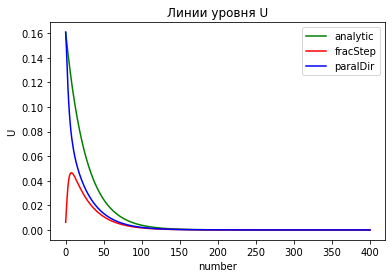

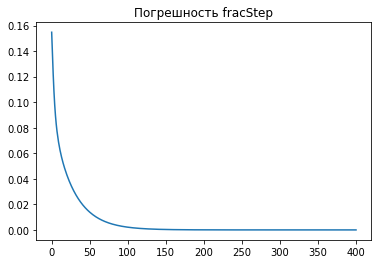

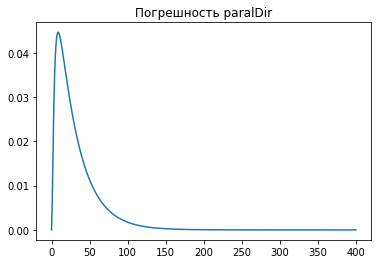

In [ ]:
data = {'a': 1, 'nx': 80, 'ny': 80, 'T': 5, 'K': 400}
a, nx, ny, T, K = int(data['a']), int(data['nx']), int(data['ny']), int(data['T']), int(data['K'])
args = {
	'a': a,
	'b': a,
	'c': 0,
	'd': 0,
	'lx': np.pi / 4,
	'ly': np.log(2),
	'f': lambda x, y, t: 0,
	'alpha1': 0,
	'alpha2': 1,
	'beta1': 1,
	'beta2': 0,
	'gamma1': 1,
	'gamma2': 0,
	'delta1': 0,
	'delta2': 1,
	'phi11': lambda y, t: np.sinh(y) * np.exp(-3 * a * t),
	'phi12': lambda y, t: -2 * np.sinh(y) * np.exp(-3 * a * t),
	'phi21': lambda x, t: np.cos(2 * x) * np.exp(-3 * a * t),
	'phi22': lambda x, t: 3 / 4 * np.cos(2 * x) * np.exp(-3 * a * t),
	'psi': lambda x, y: np.cos(2 * x) * np.sinh(y),
	'solution': lambda x, y, t: np.cos(2 * x) * np.sinh(y) * np.exp(-3 * a * t)
}

solver = ParabolicSolver(args, nx, ny, T, K)
solverFrac = ParabolicSolver(args, nx, ny, T, K)
solverParal = ParabolicSolver(args, nx, ny, T, K)
ans = {
	'fracStep': solverFrac.fractionalSteps_solver(),
	'paralDir': solverParal.parallelDirections_solver(),
	'analytic': solver.analyticSolve(nx, ny, T, K)
}

presontation(ans, data, args, 20, 20)